# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [42]:
from commonfunctions import *
from skimage import filters
import math
import skimage.io as io
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
'''
Load image
'''
image = io.imread('imgs/bird.jpg')
gray = rgb2gray(image)
#show_images([image, gray], ['Original Image', 'Gray Image'])


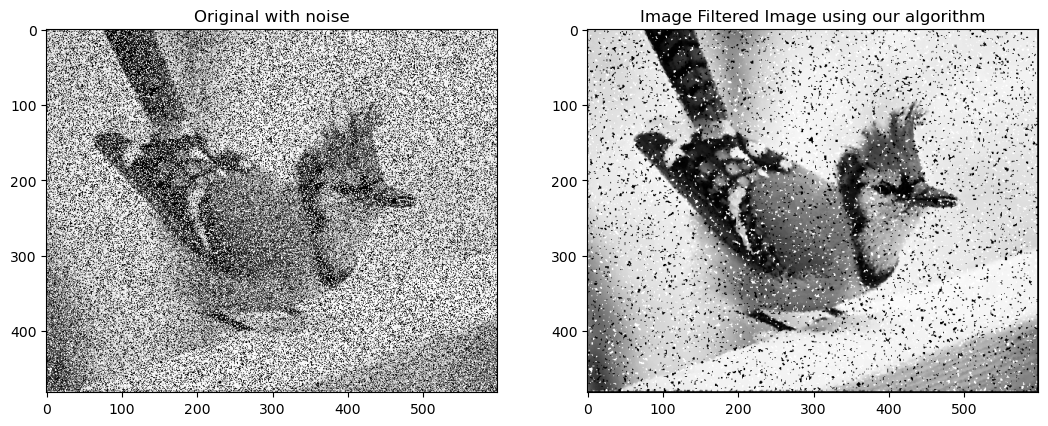

In [44]:
'''
(1) Your own median filter algorithm
''' 
def median_filter(image, window_width, window_height):
    # Get the dimensions of the image

    (image_width, image_height) = image.shape
    # Create a new image to store the result
    new_image = np.zeros((image_width, image_height))
    edgex = (window_width// 2) # 1
    edgey = ( window_height // 2) # 1
   

    for x in range(edgex,image_width - edgex):  # 1 to  image width - 1
        for y in range(edgey,image_height - edgey): # 1 to image height - 1
                    colorArray = np.zeros((window_width, window_height))
                    for fx in range(0,window_width): 
                            for fy in range(0,window_height):
                                    # print(fx, fy,y + fy - edgey,x + fx - edgex)
                                    colorArray[fx][fy] = image[x + fx - edgex][y + fy - edgey]
                    # convert to 1d array
                    # sort all entries in colorArray[][] 
                    array1D = colorArray.flatten()
                    new_image[x,y] = np.median(array1D)
    return new_image

image_noise_05 = random_noise(gray, mode='s&p', amount=0.5)
imageFiltered = median_filter(image_noise_05, 3, 3)

show_images([image_noise_05, imageFiltered], ['Original with noise', 'Image Filtered Image using our algorithm'])

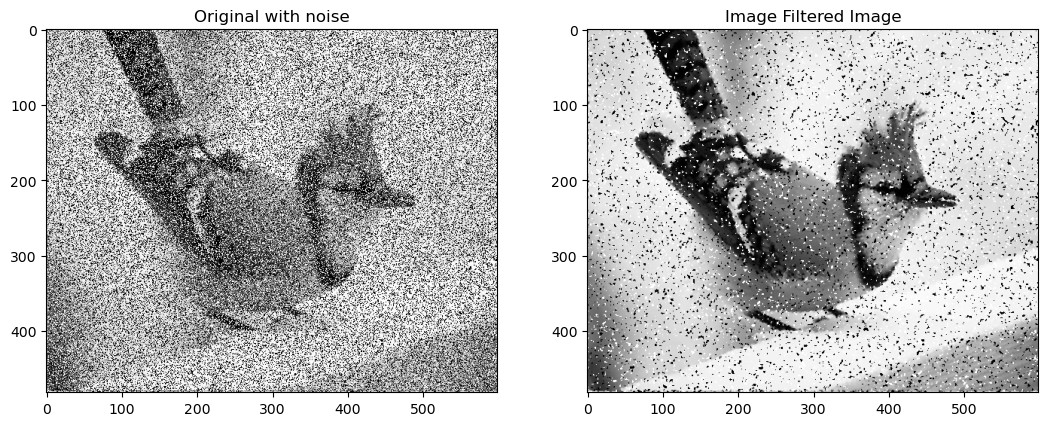

In [47]:
'''
(2) skimage median filter
'''


image_noise_05 = random_noise(gray, mode='s&p', amount=0.5)
imageFiltered = filters.median(image_noise_05, footprint=None, out=None, mode='nearest', cval=0.0, behavior='ndimage')
show_images([image_noise_05, imageFiltered], ['Original with noise', 'Image Filtered Image'])


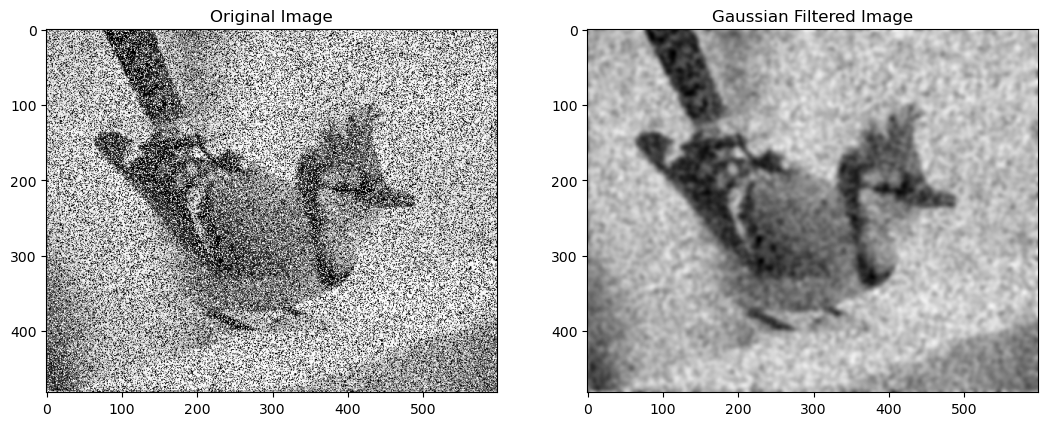

In [52]:
'''
(3) Gaussion Filters
'''
def gaussian_filter(image, sigma):
    return filters.gaussian(image, sigma=sigma)
gaussian_filtered = gaussian_filter(image_noise_05, 3)
show_images([image_noise_05, gaussian_filtered], ['Original Image', 'Gaussian Filtered Image'])